In [2]:
# import nessacery library

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
%matplotlib inline

In [5]:
path = r'/Users/tayen/Documents/CF/Advanced Analytics Dashboard Design/02 Data/Processed Data'

In [6]:
purchase = pd.read_pickle(os.path.join(path,'purchase_ga_session.pickle'))

In [14]:
visit_purchase = purchase.groupby('visitID').agg({'visits':'sum','hits':'max','pageviews':'max','transactions':'max','totalTransactionRevenue':'max'})

In [22]:
visit_purchase.to_csv(os.path.join(path,'visit_purchase.csv'),index = False)


# data already cleaned from previous tasks

In [17]:
purchase.columns

Index(['visitID', 'date', 'visits', 'hits', 'pageviews', 'timeOnSite',
       'transactions', 'totalTransactionRevenue', 'source', 'campaign',
       'medium', 'keyword', 'adNetworkType', 'browser', 'operatingSystem',
       'isMobile', 'continent', 'subContinent', 'country', 'hitNumber',
       'isInteraction', 'time', 'hour', 'minute', 'pagePath', 'hostname',
       'pageTitle', 'transactionId', 'transactionRevenue', 'transactionTax',
       'transactionShipping', 'affiliation', 'currencyCode',
       'previousContentGroup1', 'previousContentGroup2',
       'previousContentGroup3', 'dataSource', 'fullVisitorId',
       'channelGrouping', 'socialEngagementType', 'productSKU_1',
       'v2ProductName', 'v2ProductCategory', 'productVariant',
       'productRevenue', 'productPrice', 'productQuantity'],
      dtype='object')

In [18]:
visit_purchase.head(30)

,visits,hits,pageviews,transactions,totalTransactionRevenue
visitID,,,,,
1470046365,4,54,39,1,1592.40
1470050783,1,38,31,1,12.99
1470052998,1,34,28,1,32.19
1470055898,2,18,14,1,72.70
1470057237,4,32,24,1,170.40
1470061745,1,20,15,1,132.80
1470063041,5,34,24,1,29.48
1470063685,4,34,26,1,45.96
1470064251,6,34,22,1,2213.38


In [20]:
visit_purchase.reset_index()

,visitID,visits,hits,pageviews,transactions,totalTransactionRevenue
0,1470046365,4,54,39,1,1592.40
1,1470050783,1,38,31,1,12.99
2,1470052998,1,34,28,1,32.19
3,1470055898,2,18,14,1,72.70
4,1470057237,4,32,24,1,170.40
...,...,...,...,...,...,...
11502,1501641303,1,30,29,1,19.29
11503,1501641559,2,35,27,1,35.58
11504,1501646467,7,55,42,1,150.69
11505,1501647149,1,80,58,1,6.99


# hypothesis
## more hits visitor generate more likely they make a puchase

## reshape data

In [19]:
# reshape the varisbles we need into numpy arrays and put them into separate objects
X = purchase['hits'].values.reshape(-1,1)
y = purchase['transactions'].values.reshape(-1,1)

In [20]:
X

array([[32],
       [32],
       [32],
       ...,
       [ 5],
       [ 5],
       [ 5]])

In [21]:
y


array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

## split the data into training and test

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Linear Regression Analysis

In [23]:
# Create a regression object.
regression = LinearRegression()

In [24]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [25]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

## Create a plot

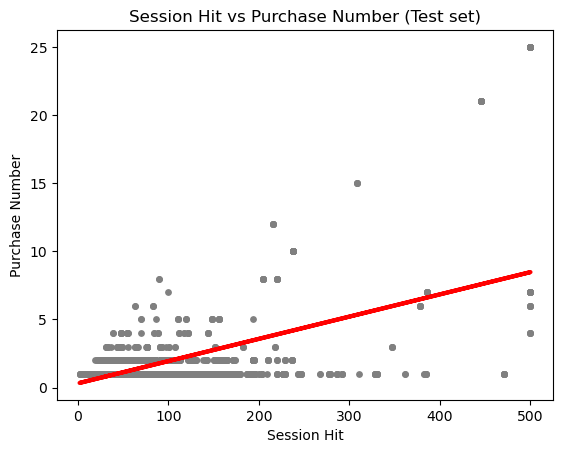

In [26]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Session Hit vs Purchase Number (Test set)')
plot_test.xlabel('Session Hit')
plot_test.ylabel('Purchase Number')
plot_test.show()

## check the model performance statistics

In [27]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [28]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.01633097]]
Mean squared error:  1.357110535635298
R2 score:  0.3273380362573517


## Compare the predicted y values with the actual y values in a dataframe

In [29]:
y_predicted

array([[0.86381491],
       [0.73316711],
       [0.70050516],
       ...,
       [1.59870876],
       [0.96180076],
       [0.79849101]])

In [30]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1,0.863815
1,1,0.733167
2,1,0.700505
3,1,1.794680
4,1,0.667843
5,1,0.667843
6,1,0.814822
7,1,1.811011
8,1,0.618850
9,1,0.798491


# Compare how the regression fits the training set

In [31]:
# Predict.
y_predicted_train = regression.predict(X_train)

In [32]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [33]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.01633097]]
Mean squared error:  1.4837132648832845
R2 score:  0.35941763762641954


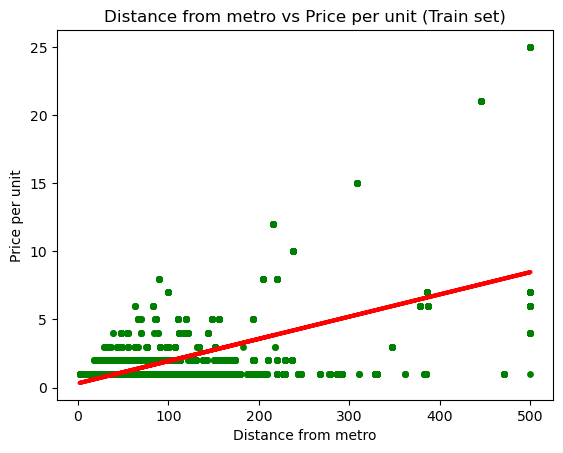

In [34]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Distance from metro vs Price per unit (Train set)')
plot_test.xlabel('Distance from metro')
plot_test.ylabel('Price per unit')
plot_test.show()

# The linear regression model doesn't work well on this data set

#### The positive slope number shows that the purchase changes in the same direction as the hit changes, but a mean squared error of 1.36 and a low R2 value of 0.33 indicate that the data set does not fit well to liner regression, and we can clearly see from the plot that many data points deviate far from the regression line, so we can confidently say that the relationship between hit and purchase is not linear.